The data is scraped from Sri Lanka's most famous online vehicle buying selling platform: Ikman.lk. by Jayawardena, Lasal. (2021). Sri Lanka Vehicle Prices Dataset. DOI: 10.13140/RG.2.2.35445.09448/1 . 

It was retrieved from Kaggle at https://www.kaggle.com/datasets/lasaljaywardena/sri-lanka-vehicle-prices-dataset 

It is made up of 123971 samples accross 19 features. Of the 19 features, 7 are not relevant for our scenerio.

**Scenerio**

Given the features of a car, we would like to predict the price of the car. The price of the car is given in Indian Rupees

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('vehicle_data.csv', low_memory=False)

In [3]:
df

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123966,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela","Rs. 6,500,000",Honda,Insight Ze3,NaN,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/honda-insight-ze3-s...,Duminda,Member,2021-11-04 23:41:00
123967,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo","Rs. 5,850,000",HINO,Dutro,NaN,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/hino-dutro-sale-col...,Areej,Member,2021-11-04 23:39:00
123968,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo","Rs. 480,000",TVS,King,NaN,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo,-,https://riyasewana.com/buy/tvs-king-sale-colom...,Safan,Member,2021-11-04 23:38:00
123969,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...,"Rs. 6,975,000",Toyota,Vitz,NaN,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/toyota-vitz-sale-ta...,Sampath Kodithuwakku,Member,2021-11-04 23:38:00


In this presentation, we would like to develop a model that can predict the price of cars. 

In [4]:
df.columns

Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')

In [5]:
unwanted_col = ['Title', 'Sub_title', 'Description', 'Post_URL', 'Seller_name', 'Seller_type', 'published_date']
df[unwanted_col]

,Title,Sub_title,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00
...,...,...,...,...,...,...,...
123966,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela","AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/honda-insight-ze3-s...,Duminda,Member,2021-11-04 23:41:00
123967,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo","AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/hino-dutro-sale-col...,Areej,Member,2021-11-04 23:39:00
123968,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo",-,https://riyasewana.com/buy/tvs-king-sale-colom...,Safan,Member,2021-11-04 23:38:00
123969,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/toyota-vitz-sale-ta...,Sampath Kodithuwakku,Member,2021-11-04 23:38:00


unwanted_col are features that will not affect the price of vehicles. As such, they shall be deleted.

## Data Cleaning and Manipulation 
- check for data type
- check and deal with column properties 
- check and deal with missing entries


In [6]:
df.dtypes

Title             object
Sub_title         object
Price             object
Brand             object
Model             object
Edition           object
Year               int64
Condition         object
Transmission      object
Body              object
Fuel              object
Capacity          object
Mileage           object
Location          object
Description       object
Post_URL          object
Seller_name       object
Seller_type       object
published_date    object
dtype: object

### Dealing with Missing Values

In [7]:
df.isna().sum()

Title                 0
Sub_title             0
Price                 0
Brand                 0
Model                 1
Edition           76433
Year                  0
Condition             0
Transmission          1
Body               5095
Fuel                  0
Capacity            205
Mileage               0
Location              0
Description       16174
Post_URL              0
Seller_name          98
Seller_type           0
published_date        0
dtype: int64

In [8]:
# Playing around to see the best strategy to dealing with missing entries in Edition
df[['Edition', 'Title', 'Sub_title', 'Description']]

,Edition,Title,Sub_title,Description
0,Limited,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...
1,Fully Loaded,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...",1st owner(registered owner)Diesel(13-14km per ...
2,GT New Face 2wd,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...
3,Toyato,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...
4,prado,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...
...,...,...,...,...
123966,NaN,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela","AIR CONDITION, POWER STEERING, POWER MIRROR, P..."
123967,NaN,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo","AIR CONDITION, POWER STEERING, POWER MIRROR, P..."
123968,NaN,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo",-
123969,NaN,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...,"AIR CONDITION, POWER STEERING, POWER MIRROR, P..."


In [9]:
# Can we fill missing entries in Edition using any of 'Title', 'Sub_title', 'Description' ? 
df[['Edition', 'Title', 'Sub_title', 'Description']][df.Edition.isna()]

,Edition,Title,Sub_title,Description
5,NaN,Toyota Land Cruiser Prado 2007 for sale,"Posted on 24 Sep 3:52 pm, Gampaha City, Gampaha",0719467796 14900000/=Toyota Land Cruiser Pr...
6,NaN,Honda CRV 2018 for sale,"Posted on 30 Sep 8:36 am, Gampaha City, Gampaha","HONDA CRV VTI L TURBO, 7 SEATER,SUNROOF,WP CB..."
7,NaN,Mitsubishi Xpander 2019 for sale,"Posted on 29 Sep 8:23 am, Maharagama, Colombo",Mitsubishi Xpander Jeep For Sale In Maharagama...
14,NaN,Suzuki Maruti 2008 for sale,"Posted on 01 Oct 8:08 am, Ruwanwella, Kegalle",A/c working ...
18,NaN,BMW 523i 2012 for sale,"Posted on 28 Sep 4:13 pm, Nugegoda, Colombo",ðºBMW 523i M Sport ðº2012 ðºKX-XXXXðº4...
...,...,...,...,...
123966,NaN,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela","AIR CONDITION, POWER STEERING, POWER MIRROR, P..."
123967,NaN,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo","AIR CONDITION, POWER STEERING, POWER MIRROR, P..."
123968,NaN,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo",-
123969,NaN,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...,"AIR CONDITION, POWER STEERING, POWER MIRROR, P..."


In [10]:
# Calculate the percentage of missing entries in Edition 
print(f'There are {round(df.Edition.isna().sum()/df.shape[0] * 100, 2)} % missing entries in Edition')

There are 61.65 % missing entries in Edition


In [11]:
df.Edition.nunique()

15260

A good imputation strategy for Edition is to extract valuable info from any of 'Title', 'Sub_title', 'Description'. Unfortunately, this strategy doesn't work fine for this dataset (considering the table above). Considering over 60% missing entry in "Edition" and the aim of this work is to build a price prediction model, I would rather drop this column than dropping rows with missing entries as over 60% of the samples would be lost.

In [12]:
# Update the unwanted_col to include 'Edition'
unwanted_col.append('Edition')

In [13]:
df[['Sub_title']][df.Model.isna()].values

array([['Posted by Pradeep on 2021-10-13 3:42 pm, Kadawatha']],
      dtype=object)

In [14]:
df[df.Body.isna()]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
7,Mitsubishi Xpander 2019 for sale,"Posted on 29 Sep 8:23 am, Maharagama, Colombo","Rs 14,400,000",Mitsubishi,Xpander,NaN,2019,Used,Automatic,NaN,Petrol,"1,500 cc","50,500 km","Maharagama, Colombo",Mitsubishi Xpander Jeep For Sale In Maharagama...,https://ikman.lk/en/ad/mitsubishi-xpander-2019...,Sell fast | Dolahena | à¶¯à·à¶±à·à·à·à¶¸à·...,Member,2022-09-29 08:23:00
16,Toyota CHR GT BOOST IMPULSE 2018 for sale,"Posted on 30 Sep 11:04 pm, Negombo, Gampaha","Rs 13,750,000",Toyota,CHR,GT BOOST IMPULSE,2018,Used,Automatic,NaN,Petrol,"1,200 cc","26,000 km","Negombo, Gampaha",ðº TOYOTA CH-R GT BOOST IMPULSE NGX 10ðº G...,https://ikman.lk/en/ad/toyota-chr-gt-boost-imp...,MR Amjath,Member,2022-09-30 23:04:00
18,BMW 523i 2012 for sale,"Posted on 28 Sep 4:13 pm, Nugegoda, Colombo","Rs 15,490,000",BMW,523i,NaN,2012,Used,Automatic,NaN,Petrol,"2,000 cc","49,000 km","Nugegoda, Colombo",ðºBMW 523i M Sport ðº2012 ðºKX-XXXXðº4...,https://ikman.lk/en/ad/bmw-523i-2012-for-sale-...,Janith Kumarage,Member,2022-09-28 16:13:00
24,Honda Vezel New Face 2018 for sale,"Posted on 29 Sep 12:54 pm, Wennappuwa, Puttalam","Rs 12,800,000",Honda,Vezel,New Face,2018,Used,Automatic,NaN,Petrol,"1,500 cc","34,000 km","Wennappuwa, Puttalam",Honda Vezel Rs Sensing Facelift Model Manufact...,https://ikman.lk/en/ad/honda-vezel-new-face-20...,Antonex,Member,2022-09-29 12:54:00
29,Toyota Aqua S grade 2013 for sale,"Posted on 01 Oct 7:23 am, Piliyandala, Colombo","Rs 6,650,000",Toyota,Aqua,S grade,2013,Used,Automatic,NaN,Petrol,"1,500 cc","89,000 km","Piliyandala, Colombo",Toyota Aqua 2013 reg 2015Toyota aqua S 1st own...,https://ikman.lk/en/ad/toyota-aqua-s-grade-201...,Charith,Premium-Member,2022-10-01 07:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61628,Mitsubishi L200 Cab 1999 for sale,"Posted on 07 Oct 9:01 pm, Dankotuwa, Puttalam","Rs 3,500,000",Mitsubishi,L200,Cab,1999,Used,Manual,NaN,Diesel,"2,500 cc","325,000 km","Dankotuwa, Puttalam",ð¢Mitsubishi L200 (1999 brand new)ð¢ðVe...,https://ikman.lk/en/ad/mitsubishi-l200-cab-199...,Sell fast l Naththandiya l Sharon Ads,Member,2022-10-07 21:01:00
61638,Suzuki Wagon R Stingray 2017 for sale,"Posted on 23 Oct 8:32 am, Gampaha City, Gampaha","Rs 5,600,000",Suzuki,Wagon R Stingray,NaN,2017,Used,Automatic,NaN,Hybrid,650 cc,"80,000 km","Gampaha City, Gampaha",Suzuki Wagon R Stingray Manufacture - 2017Good...,https://ikman.lk/en/ad/suzuki-wagon-r-stingray...,Sell fast | Biyagama Advertising,Member,2022-10-23 08:32:00
61639,Suzuki Alto 2015 for sale,"Posted on 23 Oct 8:34 am, Nittambuwa, Gampaha","Rs 2,995,000",Suzuki,Alto,NaN,2015,Used,Manual,NaN,Petrol,800 cc,"48,000 km","Nittambuwa, Gampaha",Suzuki Alto 2015*Good Condition*Power Steering...,https://ikman.lk/en/ad/suzuki-alto-2015-for-sa...,Sellfast | Veyangoda | Origin Lanka IT,Member,2022-10-23 08:34:00
61657,Toyota Land Cruiser Prado LJ79 Box 1996 for sale,"Posted on 04 Oct 11:59 am, Negombo, Gampaha","Rs 10,300,000",Toyota,Land Cruiser Prado,LJ79 Box,1996,Used,Manual,NaN,Diesel,"2,800 cc","180,000 km","Negombo, Gampaha",Toyota Land Cruiser Prado LJ79 Box Jeep For Sa...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Sell Fast | Adz King à¶¯à·à¶±à·à·à·à¶¸à· ...,Member,2022-10-04 11:59:00


In [15]:
df.Body

0            SUV / 4x4
1               Saloon
2            SUV / 4x4
3            SUV / 4x4
4            SUV / 4x4
              ...     
123966             Car
123967    Unregistered
123968     Three Wheel
123969             Car
123970             Car
Name: Body, Length: 123971, dtype: object

In [16]:
df[df.Capacity.isna()]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
63178,Loncin Super Cub 2007,Posted by Sripathi Ruwan Chamara on 2021-11-04...,"Rs. 28,000",Loncin,Super Cub,NaN,2007,Used,Manual,Motorbike,Petrol,NaN,2800,Kuliyapitiya,NaN,https://riyasewana.com/buy/loncin-super-cub-sa...,Sripathi Ruwan Chamara,Member,2021-11-04 12:15:00
63307,TVS Scooty Pep 2009,Posted by Anil Prasanna on 2021-11-04 11:49 am...,Negotiable,TVS,Scooty Pep,NaN,2009,Used,Automatic,Motorbike,Petrol,NaN,0,Galle,NaN,https://riyasewana.com/buy/tvs-scooty-pep-sale...,Anil Prasanna,Member,2021-11-04 11:49:00
63932,Honda Little Cub 2007,"Posted by Ahm on 2021-11-04 10:09 am, Kurunegala","Rs. 225,000",Honda,Little Cub,NaN,2007,Used,Automatic,Motorbike,Petrol,NaN,13000,Kurunegala,NaN,https://riyasewana.com/buy/honda-little-cub-sa...,Ahm,Member,2021-11-04 10:09:00
64911,Bajaj Caliber 2004 Motorbike,Posted by Sumedaha Ranaisnghe on 2021-11-04 7:...,"Rs. 68,000",Bajaj,Caliber,NaN,2004,e,Manual,Brand,Petrol,NaN,-,Gampaha,NaN,https://riyasewana.com/buy/bajaj-caliber-sale-...,Sumedaha Ranaisnghe,Member,2021-11-04 07:22:00
64919,Honda Dio 2019,"Posted by Sithum on 2021-11-04 7:21 am, Galle","Rs. 430,000",Honda,Dio,NaN,2019,Used,Automatic,Motorbike,Petrol,NaN,32122,Galle,NaN,https://riyasewana.com/buy/honda-dio-sale-gall...,Sithum,Member,2021-11-04 07:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122927,Honda honda 1998,Posted by Sumedaha Ranaisnghe on 2021-09-08 9:...,"Rs. 40,000",Honda,honda,NaN,1998,Used,Manual,Motorbike,Petrol,NaN,0,Gampaha,NaN,https://riyasewana.com/buy/honda-honda-sale-ga...,Sumedaha Ranaisnghe,Member,2021-09-08 09:03:00
123153,TVS Scooty pep 2005 Motorbike,Posted by Sumedaha Ranaisnghe on 2021-09-07 5:...,"Rs. 65,000",TVS,Scooty pep,NaN,2005,e,Automatic,Brand,Petrol,NaN,-,Gampaha,NaN,https://riyasewana.com/buy/tvs-scooty-pep-sale...,Sumedaha Ranaisnghe,Member,2021-09-07 17:07:00
123156,TVS Scooty pep 2009 Motorbike,Posted by Sumedaha Ranaisnghe on 2021-09-07 5:...,"Rs. 75,000",TVS,Scooty pep,NaN,2009,e,Automatic,Brand,Petrol,NaN,-,Gampaha,NaN,https://riyasewana.com/buy/tvs-scooty-pep-sale...,Sumedaha Ranaisnghe,Member,2021-09-07 17:05:00
123170,Honda C 50 2006,Posted by Sumedaha Ranaisnghe on 2021-09-07 4:...,"Rs. 60,000",Honda,C 50,NaN,2006,Used,Manual,Motorbike,Petrol,NaN,-,Gampaha,NaN,https://riyasewana.com/buy/honda-c-50-sale-gam...,Sumedaha Ranaisnghe,Member,2021-09-07 16:28:00


In [17]:
df.Capacity

0         1,500 cc
1         2,200 cc
2         1,200 cc
3         1,200 cc
4         2,700 cc
            ...   
123966        1500
123967        4000
123968          90
123969        1000
123970         800
Name: Capacity, Length: 123971, dtype: object

In [18]:
# drop unwanted columns
df.drop(columns=unwanted_col, axis = 1, inplace = True)


In [19]:
print(f' The proportion of missing values in the dataset is {round(sum(df.isna().sum())/df.shape[0], 4)}')

 The proportion of missing values in the dataset is 0.0428


Less than 5% of the dataset are missing entries. So, the missing entries can easily be dropped from the dataset

In [20]:
# drop missing entries
df.dropna(how='any', inplace=True)

In [21]:
df.isna().sum()

Price           0
Brand           0
Model           0
Year            0
Condition       0
Transmission    0
Body            0
Fuel            0
Capacity        0
Mileage         0
Location        0
dtype: int64

### Dealing with Column Properties and Data Types

In [22]:
df.Price

0          Rs 12,900,000
1          Rs 16,250,000
2          Rs 17,000,000
3          Rs 13,000,000
4          Rs 33,500,000
               ...      
123966     Rs. 6,500,000
123967     Rs. 5,850,000
123968       Rs. 480,000
123969     Rs. 6,975,000
123970     Rs. 2,625,000
Name: Price, Length: 118669, dtype: object

In [23]:
# remove leading and trailing spaces and units
# remove thousand separator
df['Price'] = df['Price'].apply(lambda x: x.strip('RsrS. ')).apply(lambda x: x.replace(',', ''))

In [24]:
df[['Capacity', 'Mileage']]

,Capacity,Mileage
0,"1,500 cc","37,000 km"
1,"2,200 cc","42,000 km"
2,"1,200 cc","15,000 km"
3,"1,200 cc","21,000 km"
4,"2,700 cc","57,000 km"
...,...,...
123966,1500,122000
123967,4000,300000
123968,90,10000
123969,1000,31000


In [25]:
# remove leading and trailing spaces and units
df['Capacity'] = df['Capacity'].apply(lambda x: x.strip('cC. '))
df['Mileage'] = df['Mileage'].apply(lambda x: x.strip('kmKM. '))

# remove thousand separator
df['Capacity'] = df['Capacity'].apply(lambda x: x.replace(',', ''))
df['Mileage'] = df['Mileage'].apply(lambda x: x.replace(',', ''))

In [26]:
df

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
0,12900000,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala"
1,16250000,Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala"
2,17000000,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo"
3,13000000,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo"
4,33500000,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha"
...,...,...,...,...,...,...,...,...,...,...,...
123966,6500000,Honda,Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela
123967,5850000,HINO,Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo
123968,480000,TVS,King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo
123969,6975000,Toyota,Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle


In [27]:
df.dtypes

Price           object
Brand           object
Model           object
Year             int64
Condition       object
Transmission    object
Body            object
Fuel            object
Capacity        object
Mileage         object
Location        object
dtype: object

In [28]:
df[df.Price == 'Negotiable']

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
61682,Negotiable,Toyota,Townace CR 42,2000,Used,Automatic,Van,Diesel,2180,195000,Matara
61685,Negotiable,Mahindra,Bolero,2015,Used,Manual,Pickup,Diesel,2523,51000,Ratnapura
61697,Negotiable,Mahindra,Bolero,2018,Used,Manual,Pickup,Diesel,2523,41000,Ratnapura
61707,Negotiable,Honda,Dio,2019,Used,Automatic,Motorbike,Petrol,110,25000,Kurunegala
61712,Negotiable,Toyota,Aqua S Limited,2014,Used,Automatic,Car,Hybrid,1500,82000,Matara
...,...,...,...,...,...,...,...,...,...,...,...
123926,Negotiable,Nissan,Trad Sunny,1989,Used,Manual,Car,Petrol,1500,0,Nittambuwa
123928,Negotiable,Hero,Hunk,2013,Used,Automatic,Motorbike,Petrol,150,53000,Nittambuwa
123932,Negotiable,Hitachi,Ex 70,1999,Used,Manual,Heavy-Duty,Diesel,-,300000,Galle
123956,Negotiable,Toyota,Vitz,2001,Used,Automatic,Car,Petrol,1000,158000,Kandy


The presence of 'Negotiable' in Price column made it impossible for us to convert to integer. To deal with this, all columns containing 'Negotiable' would be deleted 

In [29]:
index_to_drop = df[df.Price == 'Negotiable'].index
len(index_to_drop)

5492

In [30]:
df.drop(labels = index_to_drop, axis = 0)

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
0,12900000,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala"
1,16250000,Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala"
2,17000000,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo"
3,13000000,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo"
4,33500000,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha"
...,...,...,...,...,...,...,...,...,...,...,...
123966,6500000,Honda,Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela
123967,5850000,HINO,Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo
123968,480000,TVS,King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo
123969,6975000,Toyota,Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle


In [31]:
#df[['Capacity', 'Mileage']].astype('int32')

ValueError: invalid literal for int() with base 10: '-'

In [32]:
df[['Capacity', 'Mileage']][df.Mileage == '-']

,Capacity,Mileage
61738,2000,-
61747,135,-
61751,175,-
61758,12,-
61762,1500,-
...,...,...
123779,1300,-
123816,1400,-
123870,-,-
123911,3000,-


In [33]:
df[(df.Price == 'Negotiable') | (df.Capacity == '-') | (df.Mileage == '-')]

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
61682,Negotiable,Toyota,Townace CR 42,2000,Used,Automatic,Van,Diesel,2180,195000,Matara
61685,Negotiable,Mahindra,Bolero,2015,Used,Manual,Pickup,Diesel,2523,51000,Ratnapura
61697,Negotiable,Mahindra,Bolero,2018,Used,Manual,Pickup,Diesel,2523,41000,Ratnapura
61707,Negotiable,Honda,Dio,2019,Used,Automatic,Motorbike,Petrol,110,25000,Kurunegala
61712,Negotiable,Toyota,Aqua S Limited,2014,Used,Automatic,Car,Hybrid,1500,82000,Matara
...,...,...,...,...,...,...,...,...,...,...,...
123928,Negotiable,Hero,Hunk,2013,Used,Automatic,Motorbike,Petrol,150,53000,Nittambuwa
123930,3200000,TAFE,7250DI,2021,e,Manual,Brand,Diesel,-,-,Anuradapura
123932,Negotiable,Hitachi,Ex 70,1999,Used,Manual,Heavy-Duty,Diesel,-,300000,Galle
123956,Negotiable,Toyota,Vitz,2001,Used,Automatic,Car,Petrol,1000,158000,Kandy


In [34]:
index_to_drop = df[(df.Price == 'Negotiable') | (df.Capacity == '-') | (df.Mileage == '-')].index
len(index_to_drop)

13140

In [35]:
print(f'proportion of index to be dropped is: \t{round(len(index_to_drop)/df.shape[0], 4)}')

proportion of index to be dropped is: 	0.1107


Fair enough! 

In [36]:
df.drop(labels = index_to_drop, axis = 0, inplace = True)

In [37]:
df

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
0,12900000,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala"
1,16250000,Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala"
2,17000000,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo"
3,13000000,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo"
4,33500000,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha"
...,...,...,...,...,...,...,...,...,...,...,...
123966,6500000,Honda,Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela
123967,5850000,HINO,Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo
123968,480000,TVS,King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo
123969,6975000,Toyota,Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle


In [38]:
# Change data types of numeric columns
#numerical_col = ['Price', 'Capacity', 'Mileage']
#df[numerical_col] = df[numerical_col].astype('int32')

ValueError: invalid literal for int() with base 10: 'Manual'

In [39]:
# convert Price dtype to Integer
df['Price'] = df['Price'].astype('int32')

In [40]:
# convert mileage dtype to integer
df['Mileage'] = df['Mileage'].astype('int64')

In [41]:
# convert mileage dtype to integer
#df['Capacity'] = df['Capacity'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Manual'

In [42]:
df[(df.Capacity=='Manual') | (df.Capacity=='Automati')]

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
70741,250000,Suzuki,Gn125 Japan,2000,Used,Automatic,Motorbike,Petrol,Manual,12345,Panadura
81869,485000,Bajaj,Avenger,2017,Used,Automatic,Motorbike,Petrol,Manual,28000,Hambantota
90444,610000,Yamaha,FZ-S Version 2.0,2019,Used,Automatic,Motorbike,Petrol,Manual,22000,Matugama
96061,250000,Bajaj,Pulsar,2011,Used,Automatic,Motorbike,Petrol,Manual,60000,Nittambuwa
102097,355000,TVS,Wego,2018,Used,Automatic,Motorbike,Petrol,Automati,22500,Galle
105978,55000,Yamaha,Yamaha,2004,Used,Automatic,Motorbike,Petrol,Manual,50000,Kegalle
110846,710000,Honda,pcx,2015,Used,Automatic,Motorbike,Petrol,Manual,59000,Kandy
111908,200000,Bajaj,Discover 135,2009,Used,Automatic,Motorbike,Petrol,Manual,65000,Polonnaruwa
115813,28500,Yamaha,Mate,1985,Used,Automatic,Motorbike,Petrol,Manual,455,Kandy
117619,300000,Honda,Navi,2019,Used,Automatic,Motorbike,Petrol,Automati,8000,Gampaha


In [43]:
# drop all entries in Capacity entered as 'Manual'
drop_more_index = df[(df.Capacity=='Manual') | (df.Capacity=='Automati')].index

df.drop(labels = drop_more_index, inplace = True)

In [44]:
# convert mileage dtype to integer
df['Capacity'] = df['Capacity'].astype('int64')

In [45]:
df.dtypes

Price            int32
Brand           object
Model           object
Year             int64
Condition       object
Transmission    object
Body            object
Fuel            object
Capacity         int64
Mileage          int64
Location        object
dtype: object

In [46]:
df.select_dtypes('object').nunique()

Brand            122
Model           7090
Condition          5
Transmission      13
Body              22
Fuel               9
Location         328
dtype: int64

Combination of brand and model gives the vehicle name. Additional column is created and denoted by name

In [47]:
df.insert(0, "Name", df.Brand + ' ' + df.Model)

In [48]:
df

,Name,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
0,Honda Vezel,12900000,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala"
1,Jaguar XF,16250000,Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala"
2,Toyota CHR,17000000,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo"
3,Toyota CHR,13000000,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo"
4,Toyota Land Cruiser Prado,33500000,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha"
...,...,...,...,...,...,...,...,...,...,...,...,...
123966,Honda Insight Ze3,6500000,Honda,Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela
123967,HINO Dutro,5850000,HINO,Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo
123968,TVS King,480000,TVS,King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo
123969,Toyota Vitz,6975000,Toyota,Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle


Re arrange the columns to standard practice

In [49]:
price = df.pop('Price')

In [50]:
price.name

'Price'

In [51]:
df.insert(11, price.name, price)

In [52]:
df

,Name,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Price
0,Honda Vezel,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala",12900000
1,Jaguar XF,Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala",16250000
2,Toyota CHR,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo",17000000
3,Toyota CHR,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo",13000000
4,Toyota Land Cruiser Prado,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha",33500000
...,...,...,...,...,...,...,...,...,...,...,...,...
123966,Honda Insight Ze3,Honda,Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela,6500000
123967,HINO Dutro,HINO,Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo,5850000
123968,TVS King,TVS,King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo,480000
123969,Toyota Vitz,Toyota,Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle,6975000


In [53]:
# Drop Brand and Model since Name shows both Brand and Model
df.drop(columns = ['Brand', 'Model'], axis = 1, inplace = True)

In [54]:
df

,Name,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Price
0,Honda Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala",12900000
1,Jaguar XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala",16250000
2,Toyota CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo",17000000
3,Toyota CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo",13000000
4,Toyota Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha",33500000
...,...,...,...,...,...,...,...,...,...,...
123966,Honda Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela,6500000
123967,HINO Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo,5850000
123968,TVS King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo,480000
123969,Toyota Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle,6975000


In [55]:
df.dtypes

Name            object
Year             int64
Condition       object
Transmission    object
Body            object
Fuel            object
Capacity         int64
Mileage          int64
Location        object
Price            int32
dtype: object

In [56]:
df.select_dtypes('object').nunique()

Name            7525
Condition          5
Transmission      13
Body              22
Fuel               9
Location         328
dtype: int64

In [57]:
categorical_col = df.select_dtypes('object').columns.tolist()

In [58]:
df[categorical_col] = df[categorical_col].astype('category')

In [59]:
df.dtypes

Name            category
Year               int64
Condition       category
Transmission    category
Body            category
Fuel            category
Capacity           int64
Mileage            int64
Location        category
Price              int32
dtype: object

In [ ]:
# Convert Year to datetime
#df['Year'] = pd.to_datetime(df.Year)

# Extract just the year
#df['Year'] = df['Year'].dt.year

In [60]:
df

,Name,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Price
0,Honda Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala",12900000
1,Jaguar XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala",16250000
2,Toyota CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo",17000000
3,Toyota CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo",13000000
4,Toyota Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha",33500000
...,...,...,...,...,...,...,...,...,...,...
123966,Honda Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela,6500000
123967,HINO Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo,5850000
123968,TVS King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo,480000
123969,Toyota Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle,6975000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105518 entries, 0 to 123970
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Name          105518 non-null  category
 1   Year          105518 non-null  int64   
 2   Condition     105518 non-null  category
 3   Transmission  105518 non-null  category
 4   Body          105518 non-null  category
 5   Fuel          105518 non-null  category
 6   Capacity      105518 non-null  int64   
 7   Mileage       105518 non-null  int64   
 8   Location      105518 non-null  category
 9   Price         105518 non-null  int32   
dtypes: category(6), int32(1), int64(3)
memory usage: 4.7 MB


## EDA

Let's examine the distribution of the target variable 'Price'

<Axes: >

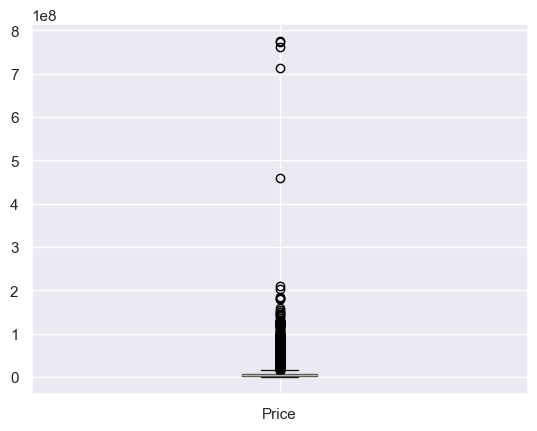

In [62]:
df[['Price']].boxplot()

Price contains a whole lot of outliers. 

In [63]:
#define a function to find outliers using IQR
def find_outliers(col):
    #calculate the first and third quartiles
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    #calculate the interquartile range
    iqr = q3 - q1
    #calculate the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    #return a boolean series indicating whether each value is an outlier
    return col[(col < lower_bound) | (col > upper_bound)]


In [64]:
#apply the function to each column of the dataframe
outliers = df[['Price']].apply(find_outliers)
outliers

,Price
4,33500000
6,19100000
11,19990000
19,22000000
21,20800000
...,...
123810,22000000
123822,150000000
123843,18200000
123875,42000000


There are about 8,000 outliers in the target variable. 

In [65]:
outliers_index = outliers.index.tolist()

In [66]:
df.loc[outliers_index]

,Name,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Price
4,Toyota Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000,"Kelaniya, Gampaha",33500000
6,Honda CRV,2018,Used,Automatic,SUV / 4x4,Petrol,1500,37134,"Gampaha City, Gampaha",19100000
11,Mitsubishi Montero,2013,Used,Automatic,SUV / 4x4,Diesel,3200,110000,"Boralesgamuwa, Colombo",19990000
19,Mercedes Benz C350,2016,Used,Automatic,Saloon,Hybrid,2000,146000,"Anuradhapura City, Anuradhapura",22000000
21,Toyota Harrier,2015,Used,Automatic,SUV / 4x4,Hybrid,2500,92000,"Kohuwala, Colombo",20800000
...,...,...,...,...,...,...,...,...,...,...
123810,Toyota KDH,2019,Used,Automatic,Van,Diesel,3000,12123,Balangoda,22000000
123822,Toyota Premio,2018,Used,Automatic,Car,Petrol,1500,58000,Colombo,150000000
123843,Toyota Premio,2018,Used,Automatic,Car,Petrol,1500,37000,Kurunegala,18200000
123875,Suzuki Wagon R Stingray,2014,Used,Automatic,Car,Petrol,660,36000,Kadugannawa,42000000


In [67]:
# drop outliers
df.drop(labels=outliers_index, inplace=True)

In [68]:
df

,Name,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Price
0,Honda Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000,"Kurunegala City, Kurunegala",12900000
1,Jaguar XF,2013,Used,Automatic,Saloon,Diesel,2200,42000,"Kurunegala City, Kurunegala",16250000
2,Toyota CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000,"Colombo 7, Colombo",17000000
3,Toyota CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000,"Colombo 7, Colombo",13000000
5,Toyota Land Cruiser Prado,2007,Used,Automatic,SUV / 4x4,Petrol,2700,120000,"Gampaha City, Gampaha",14900000
...,...,...,...,...,...,...,...,...,...,...
123966,Honda Insight Ze3,2012,Used,Automatic,Car,Hybrid,1500,122000,Ja-Ela,6500000
123967,HINO Dutro,2011,Recondition,Manual,Unregistered,Diesel,4000,300000,Colombo,5850000
123968,TVS King,2017,Used,Manual,Three Wheel,Petrol,90,10000,Colombo,480000
123969,Toyota Vitz,2018,Used,Automatic,Car,Petrol,1000,31000,Tangalle,6975000


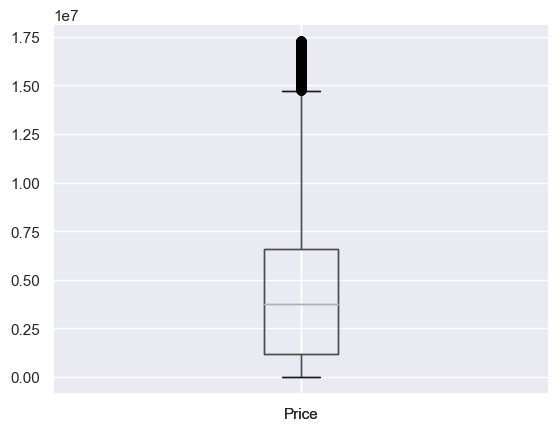

In [70]:
df[['Price']].boxplot()
plt.show()

In [71]:
df.describe()

,Year,Capacity,Mileage,Price
count,97109.000000,9.710900e+04,9.710900e+04,9.710900e+04
mean,2008.326808,1.963638e+04,3.690773e+05,4.558294e+06
std,21.217978,3.027480e+06,2.034213e+07,3.943873e+06
min,0.000000,-1.600000e+03,0.000000e+00,8.500000e+01
25%,2004.000000,6.500000e+02,3.960000e+04,1.190000e+06
50%,2012.000000,1.300000e+03,7.520000e+04,3.750000e+06
75%,2016.000000,1.500000e+03,1.260000e+05,6.600000e+06
max,2561.000000,7.010178e+08,4.596363e+09,1.727500e+07


In [72]:
df.describe(include='category')

,Name,Condition,Transmission,Body,Fuel,Location
count,97109,97109,97109,97109,97109,97109
unique,7206,5,13,22,9,328
top,Toyota Vitz,Used,Automatic,Hatchback,Petrol,Colombo
freq,3076,94698,60744,20886,70017,4423


In [ ]:
#sns.pairplot(df)

## Data preprocessing

In [73]:
df.select_dtypes('category').nunique()

Name            7206
Condition          5
Transmission      13
Body              22
Fuel               9
Location         328
dtype: int64

In [74]:
df.Condition.unique()

['Used', 'Reconditioned', 'New', 'e', 'Recondition']
Categories (5, object): ['New', 'Recondition', 'Reconditioned', 'Used', 'e']

In [75]:
df.Condition.value_counts()

Used             94698
Reconditioned     1173
Recondition        663
New                372
e                  203
Name: Condition, dtype: int64

Recondition and Reconditioned can be regarded as typographical error. Hence can be corrected by merging both 

In [76]:
# rewrite Recondition as Reconditioned
df['Condition'] = np.where(df['Condition']=='Recondition', 'Reconditioned', df.Condition.values)

In [77]:
df.Condition.value_counts()

Used             94698
Reconditioned     1836
New                372
e                  203
Name: Condition, dtype: int64

This can be converted to numerical values using One Hot Encoding as this will create 4 additional columns

In [78]:
df.Fuel.value_counts()

Petrol             70017
Diesel             14464
Hybrid             12131
Electric             413
CNG                   36
Other fuel type       35
Kick                   6
Gas                    5
Kick / Electric        2
Name: Fuel, dtype: int64

Fuel can also be converted to numerical values using One Hot Encoding as this will create 9 additional columns

In [79]:
df.Transmission.value_counts()

Automatic             60744
Manual                33170
Tiptronic              3156
Other transmission       28
150                       2
1500                      2
11                        1
1200                      1
175                       1
2001                      1
205                       1
444444444                 1
650                       1
Name: Transmission, dtype: int64

The numeric Transmission types can be added to the category named 'Other Transmission'. However, I chose to delete as they are so small (about 10) and i wouldn't like to do any imputation so as not to compromise the data in any way

In [80]:
# Declare all numeric transmission types as missing entries
df['Transmission'] = np.where(df.Transmission.values.isin(['Automatic', 'Manual', 'Tiptronic', 'Other transmission']), 
                              df.Transmission.values, np.nan)



In [81]:
# Print the sum of numeric transmission types (now denoted as missing entries)
print(f"The sum of numeric transmission types (now denoted as missing entries) is: \t{df['Transmission'].isna().sum()}")

# drop all numeric transmission types (now denoted as missing entries)
df.dropna(inplace=True)

The sum of numeric transmission types (now denoted as missing entries) is: 	11


In [82]:
df.Transmission.value_counts()

Automatic             60744
Manual                33170
Tiptronic              3156
Other transmission       28
Name: Transmission, dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97098 entries, 0 to 123970
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          97098 non-null  category
 1   Year          97098 non-null  int64   
 2   Condition     97098 non-null  object  
 3   Transmission  97098 non-null  object  
 4   Body          97098 non-null  category
 5   Fuel          97098 non-null  category
 6   Capacity      97098 non-null  int64   
 7   Mileage       97098 non-null  int64   
 8   Location      97098 non-null  category
 9   Price         97098 non-null  int32   
dtypes: category(4), int32(1), int64(3), object(2)
memory usage: 5.7+ MB


Transmission can also be converted to numerical values using One Hot Encoding as this will create 4 additional columns

In [84]:
df.Location.value_counts()

 Colombo                   4423
 Kurunegala                3483
 Gampaha                   3323
 Kandy                     3240
 Malabe,  Colombo          2687
                           ... 
 Sigiriya                     2
 Sigiriya,  Matale            1
 Madulla,  Nuwara Eliya       1
 Mullativu,  Mullativu        1
 Kitulgala,  Kegalle          1
Name: Location, Length: 328, dtype: int64

In [85]:
df.Name.value_counts()

Toyota Vitz                   3076
Suzuki Alto                   2950
Suzuki Wagon R Stingray       2128
Toyota Axio                   2121
Toyota Aqua                   2024
                              ... 
Mercedes-Benz E230               0
Mercedes-Benz E250 AMG           0
Mercedes-Benz E300               0
Mercedes-Benz E300 Bluetec       0
Land-Rover DEFENDER              0
Name: Name, Length: 7525, dtype: int64

In [86]:
df.Body.value_counts()

Hatchback        20886
Car              18239
Saloon           16364
Motorbike        13233
SUV / 4x4         8372
Van               3992
Three Wheel       3380
Lorry             2879
SUV               2553
Station wagon     2523
Pickup            1085
Unregistered       663
Bus                642
MPV                560
Wagon              387
Tractor            385
CoupÃ©/Sports      365
Brand              203
Heavy-Duty         145
Convertible        123
Cab                118
Other                1
Name: Body, dtype: int64

In [87]:
# rewrite Recondition as Reconditioned
df['Body'] = np.where(df['Body']=='SUV / 4x4', 'SUV', df.Body.values)

In [88]:
df.Body.value_counts()

Hatchback        20886
Car              18239
Saloon           16364
Motorbike        13233
SUV              10925
Van               3992
Three Wheel       3380
Lorry             2879
Station wagon     2523
Pickup            1085
Unregistered       663
Bus                642
MPV                560
Wagon              387
Tractor            385
CoupÃ©/Sports      365
Brand              203
Heavy-Duty         145
Convertible        123
Cab                118
Other                1
Name: Body, dtype: int64

Body, Name and Location can be converted to numerical values using frequency encoder due to the large number of unique entries

In [89]:
# Calculate Frequency of each category
body_freq = df.Body.value_counts()
name_freq = df.Name.value_counts()
loc_freq = df.Location.value_counts()

# Replace the categorical values with the frequency
df['Name'] = df['Name'].map(name_freq)
df['Body'] = df['Body'].map(body_freq)
df['Location'] = df['Location'].map(loc_freq)

In [90]:
df

,Name,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Price
0,1769,2017,Used,Automatic,10925,Hybrid,1500,37000,856,12900000
1,44,2013,Used,Automatic,16364,Diesel,2200,42000,856,16250000
2,789,2020,Used,Automatic,10925,Petrol,1200,15000,230,17000000
3,789,2017,Used,Automatic,10925,Petrol,1200,21000,230,13000000
5,413,2007,Used,Automatic,10925,Petrol,2700,120000,1079,14900000
...,...,...,...,...,...,...,...,...,...,...
123966,4,2012,Used,Automatic,18239,Hybrid,1500,122000,550,6500000
123967,4,2011,Reconditioned,Manual,663,Diesel,4000,300000,4423,5850000
123968,120,2017,Used,Manual,3380,Petrol,90,10000,4423,480000
123969,3076,2018,Used,Automatic,18239,Petrol,1000,31000,340,6975000


In [91]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [92]:
# Define columns to be encoded
one_hot_enc_col = ['Condition', 'Transmission', 'Fuel']

In [93]:
dummy = pd.get_dummies(df[one_hot_enc_col])
df = pd.concat([dummy, df], axis=1)
df.drop(columns = one_hot_enc_col, axis=1, inplace=True)
df

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Location,Price
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1769,2017,10925,1500,37000,856,12900000
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,44,2013,16364,2200,42000,856,16250000
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,789,2020,10925,1200,15000,230,17000000
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,789,2017,10925,1200,21000,230,13000000
5,0,0,1,0,1,0,0,0,0,0,...,0,0,1,413,2007,10925,2700,120000,1079,14900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123966,0,0,1,0,1,0,0,0,0,0,...,0,0,0,4,2012,18239,1500,122000,550,6500000
123967,0,1,0,0,0,1,0,0,0,1,...,0,0,0,4,2011,663,4000,300000,4423,5850000
123968,0,0,1,0,0,1,0,0,0,0,...,0,0,1,120,2017,3380,90,10000,4423,480000
123969,0,0,1,0,1,0,0,0,0,0,...,0,0,1,3076,2018,18239,1000,31000,340,6975000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97098 entries, 0 to 123970
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Condition_New                    97098 non-null  uint8
 1   Condition_Reconditioned          97098 non-null  uint8
 2   Condition_Used                   97098 non-null  uint8
 3   Condition_e                      97098 non-null  uint8
 4   Transmission_Automatic           97098 non-null  uint8
 5   Transmission_Manual              97098 non-null  uint8
 6   Transmission_Other transmission  97098 non-null  uint8
 7   Transmission_Tiptronic           97098 non-null  uint8
 8   Fuel_CNG                         97098 non-null  uint8
 9   Fuel_Diesel                      97098 non-null  uint8
 10  Fuel_Electric                    97098 non-null  uint8
 11  Fuel_Gas                         97098 non-null  uint8
 12  Fuel_Hybrid                      97098 non-nu

**After Thought (from presentation feedback)**

I would like to neglect the effect of location on the target and focus on just the car properties or features that are directly connected/related to the car.

In [95]:
# Drop location
df.drop(columns='Location', inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97098 entries, 0 to 123970
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Condition_New                    97098 non-null  uint8
 1   Condition_Reconditioned          97098 non-null  uint8
 2   Condition_Used                   97098 non-null  uint8
 3   Condition_e                      97098 non-null  uint8
 4   Transmission_Automatic           97098 non-null  uint8
 5   Transmission_Manual              97098 non-null  uint8
 6   Transmission_Other transmission  97098 non-null  uint8
 7   Transmission_Tiptronic           97098 non-null  uint8
 8   Fuel_CNG                         97098 non-null  uint8
 9   Fuel_Diesel                      97098 non-null  uint8
 10  Fuel_Electric                    97098 non-null  uint8
 11  Fuel_Gas                         97098 non-null  uint8
 12  Fuel_Hybrid                      97098 non-nu

In [97]:
df.Year.describe()

count    97098.000000
mean      2008.327308
std         21.218886
min          0.000000
25%       2004.000000
50%       2012.000000
75%       2016.000000
max       2561.000000
Name: Year, dtype: float64

**Red Flag Alert**

Car produced in the year 0 (Before year began/before creation) and cars produced in the year 2561 (cars produced in the future available for sales now!). So I had to deal with this by considering cars that are produce between 1980 and 2023 only

In [98]:
df[df.Year==0]

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
66654,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,5,0,18239,1200,100000,790000
67256,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,18239,1000,165957,1510000
83197,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,84,0,18239,1200,25000,500000
83548,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,7,0,10925,2200,1234,6900000
91038,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,84,0,18239,1300,89000,1500000
99079,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,99,0,2879,1000,100000,1000000
118922,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,18239,1500,25000,975000
118926,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,18239,800,15000,2675000


In [99]:
df[df.Year>=2024]

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
90257,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,138,2557,13233,1500,75000,350000
96345,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,17,2561,18239,650,21525,6400000


In [100]:
df[df.Year<1980]

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
215,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,139,1979,2523,1200,45000,280000
239,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1771,1978,16364,1400,52155,425000
310,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1246,1979,2523,1400,49597,340000
553,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1771,1978,16364,1400,361200,490000
670,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1246,1978,2523,1400,165000,375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123098,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,84,1962,18239,1200,12550,700000
123332,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,2,1973,18239,1500,150000,450000
123457,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1771,1978,663,1400,56877,700000
123466,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1960,663,1500,1111,650000


In [101]:
df[(df.Year<1980) | (df.Year>2023)].index.tolist()

[215,
 239,
 310,
 553,
 670,
 851,
 876,
 897,
 934,
 1046,
 1087,
 1096,
 1219,
 1335,
 1464,
 1478,
 1482,
 1487,
 1497,
 1498,
 1766,
 1785,
 2033,
 2091,
 2097,
 2140,
 2148,
 2151,
 2272,
 2302,
 2338,
 2357,
 2476,
 2530,
 2572,
 2574,
 2595,
 2714,
 2750,
 2751,
 2752,
 2754,
 2755,
 2901,
 2938,
 3002,
 3098,
 3186,
 3190,
 3235,
 3434,
 3448,
 3586,
 3593,
 3595,
 3745,
 3775,
 3788,
 3793,
 3824,
 3828,
 3901,
 4040,
 4063,
 4104,
 4359,
 4425,
 4534,
 4580,
 4582,
 4673,
 4727,
 4766,
 4980,
 5028,
 5189,
 5330,
 5600,
 5742,
 5744,
 5793,
 5839,
 5892,
 5907,
 5967,
 6054,
 6064,
 6312,
 6527,
 6685,
 6741,
 6746,
 6759,
 7027,
 7028,
 7115,
 7149,
 7224,
 7318,
 7361,
 7391,
 7468,
 7514,
 7521,
 7576,
 7655,
 7685,
 7743,
 7768,
 7836,
 7876,
 7885,
 7888,
 7925,
 7934,
 7935,
 7955,
 7966,
 7971,
 7987,
 7990,
 7993,
 7994,
 8000,
 8025,
 8064,
 8076,
 8099,
 8108,
 8114,
 8130,
 8134,
 8135,
 8140,
 8170,
 8188,
 8211,
 8219,
 8252,
 8398,
 8467,
 8498,
 8561,
 8650,
 

In [102]:
df[(df.Year<1980) | (df.Year>2023)].index

Int64Index([   215,    239,    310,    553,    670,    851,    876,    897,
               934,   1046,
            ...
            122704, 122736, 122822, 122852, 122912, 123098, 123332, 123457,
            123466, 123695],
           dtype='int64', length=1838)

In [103]:
df.loc[df[(df.Year<1980) | (df.Year>2023)].index.tolist()]

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
215,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,139,1979,2523,1200,45000,280000
239,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1771,1978,16364,1400,52155,425000
310,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1246,1979,2523,1400,49597,340000
553,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1771,1978,16364,1400,361200,490000
670,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1246,1978,2523,1400,165000,375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123098,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,84,1962,18239,1200,12550,700000
123332,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,2,1973,18239,1500,150000,450000
123457,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1771,1978,663,1400,56877,700000
123466,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1960,663,1500,1111,650000


In [104]:
df = df.drop(labels=df[(df.Year<1980) | (df.Year>2023)].index.tolist())
df

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1769,2017,10925,1500,37000,12900000
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,44,2013,16364,2200,42000,16250000
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,789,2020,10925,1200,15000,17000000
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,789,2017,10925,1200,21000,13000000
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,413,2007,10925,2700,120000,14900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123966,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,4,2012,18239,1500,122000,6500000
123967,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,4,2011,663,4000,300000,5850000
123968,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,120,2017,3380,90,10000,480000
123969,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,3076,2018,18239,1000,31000,6975000


In [105]:
df.Mileage.describe()

count    9.526000e+04
mean     3.562913e+05
std      2.016940e+07
min      0.000000e+00
25%      3.900000e+04
50%      7.500000e+04
75%      1.250000e+05
max      4.596363e+09
Name: Mileage, dtype: float64

In [106]:
df[df.Mileage==0]

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
225,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,109,2019,10925,1500,0,16800000
245,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,785,2018,2523,660,0,6000000
316,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,785,2017,2523,660,0,5500000
388,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,519,2016,560,2000,0,13500000
457,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,18,2020,20886,1000,0,8200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123782,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,313,2008,13233,100,0,140000
123862,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,103,2019,13233,125,0,519000
123905,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,330,2006,13233,125,0,125000
123922,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,103,2019,13233,125,0,519000


Since mileage of 0 km denotes a new car, it was observed that some used car also had a 0 km mileage. This is a data entry error. Hence, I had to remove samples whose condition does not agree with the mileage by considering vehicles with less than 3km as new vehicles

In [107]:
df[(df.Mileage>3) & (df.Condition_New==1)]

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
2612,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,660,2016,20886,650,970,6200000
7783,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,239,2021,10925,1500,19,10200000
8410,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,95,2013,20886,1000,125000,1390000
8413,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1005,2017,20886,650,16000,4150000
8414,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,117,2008,10925,1500,125000,4900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55275,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,597,2008,10925,3000,112000,11000000
55602,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,239,2021,10925,1240,55,5290000
56607,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,239,2021,10925,1500,123,9550000
57173,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,15,2016,20886,1300,400,8500000


In [108]:
df[(df.Mileage<3) & (df.Condition_New==0)]

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
7880,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,37,1986,10925,2500,0,1600000
8676,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,408,1992,16364,1500,1,2030000
13590,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,52,2009,10925,2700,0,60000
13591,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,52,2009,10925,2700,0,26000
14100,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,2128,2018,20886,650,0,5750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123782,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,313,2008,13233,100,0,140000
123862,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,103,2019,13233,125,0,519000
123905,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,330,2006,13233,125,0,125000
123922,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,103,2019,13233,125,0,519000


In [109]:
# When mileage is less than 3 Km, such vehicle can be regarded as  NEW.
wrong_mileage = df[((df.Mileage<3) & (df.Condition_New==0)) | ((df.Mileage>3) & (df.Condition_New==1))]
wrong_mileage

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
2612,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,660,2016,20886,650,970,6200000
7783,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,239,2021,10925,1500,19,10200000
7880,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,37,1986,10925,2500,0,1600000
8410,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,95,2013,20886,1000,125000,1390000
8413,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1005,2017,20886,650,16000,4150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123782,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,313,2008,13233,100,0,140000
123862,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,103,2019,13233,125,0,519000
123905,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,330,2006,13233,125,0,125000
123922,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,103,2019,13233,125,0,519000


I'd remove all samples whose mileage is less than 3km and classified as used and all samples whose mileage is graeter than 3 Km and classified as New

In [110]:
df = df.drop(labels=wrong_mileage.index)
df

,Condition_New,Condition_Reconditioned,Condition_Used,Condition_e,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_CNG,Fuel_Diesel,...,Fuel_Kick,Fuel_Kick / Electric,Fuel_Other fuel type,Fuel_Petrol,Name,Year,Body,Capacity,Mileage,Price
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1769,2017,10925,1500,37000,12900000
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,44,2013,16364,2200,42000,16250000
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,789,2020,10925,1200,15000,17000000
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,789,2017,10925,1200,21000,13000000
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,413,2007,10925,2700,120000,14900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123966,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,4,2012,18239,1500,122000,6500000
123967,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,4,2011,663,4000,300000,5850000
123968,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,120,2017,3380,90,10000,480000
123969,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,3076,2018,18239,1000,31000,6975000


In [111]:
df.Year.describe()

count    94299.000000
mean      2009.224944
std          9.280593
min       1980.000000
25%       2005.000000
50%       2013.000000
75%       2016.000000
max       2022.000000
Name: Year, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [113]:
X = df.drop('Price', axis=1).values
y= df['Price'].values

In [114]:
# split into training and test sets
X_train_total, X_test, y_train_total, y_test = train_test_split(X, y, test_size=0.2, random_state=419)

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_total, y_train_total, test_size=0.2, random_state=419)

In [115]:
# normalize the training sets
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)


# normalize the training sets

y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_val = scaler.fit_transform(y_val.reshape(-1,1))
y_test = scaler.fit_transform(y_test.reshape(-1,1))

In [116]:
X_train.shape

(60351, 22)

# Deep Learning Model
Since this is a regression task, the Mean Absolute Error would be used for the loss function. To have a better understanding on how the model performs, the Mean Square Error (MSE) and Mean Square Logarithmic Error (MSLE) would be used as the metric. 

Due to the large spread of values of the target (Price), to avoid punishing the model when predicting small values, I opted to use the MSLE (the percentual difference between the log transformed actual and predicted values). 
- The MSLE tries to treat the small differences between small actual and predicted values approximately the same as big differences between large actual and predicted values.

In [117]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Define a simple Architecture


In [118]:
# Set random seed
tf.random.set_seed(419)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mse', 'msle'])

# Fit the model and save the history (we can plot this)
history1 = model_1.fit(scaler.fit_transform(X_train_total), scaler.fit_transform(y_train_total.reshape(-1,1)), epochs=5)


Epoch 1/5
2358/2358 [==============================] - 3s 1ms/step - loss: 0.1834 - mse: 0.0731 - msle: 0.0353
Epoch 2/5
2358/2358 [==============================] - 3s 1ms/step - loss: 0.1339 - mse: 0.0373 - msle: 0.0196
Epoch 3/5
2358/2358 [==============================] - 3s 1ms/step - loss: 0.1339 - mse: 0.0373 - msle: 0.0197
Epoch 4/5
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1339 - mse: 0.0373 - msle: 0.0196
Epoch 5/5
2358/2358 [==============================] - 3s 1ms/step - loss: 0.1338 - mse: 0.0373 - msle: 0.0196


In [119]:
loss1, mse1, msle1 = model_1.evaluate(X_test, scaler.fit_transform(y_test.reshape(-1,1)))
loss1, mse1, msle1 

590/590 [==============================] - 1s 1ms/step - loss: 0.1354 - mse: 0.0365 - msle: 0.0195


(0.1353520303964615, 0.036516930907964706, 0.019515248015522957)

It was observed that 
- the loss falls sharply which indicates a poor learning



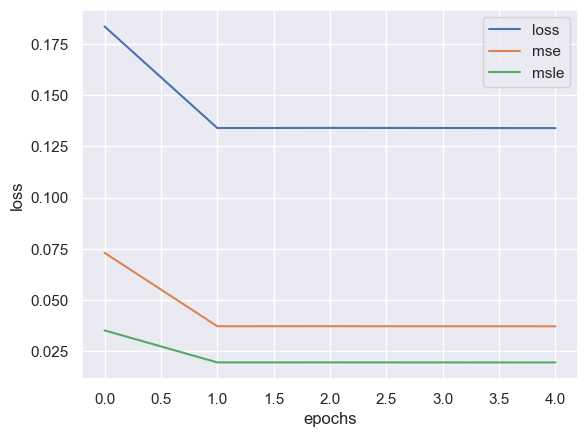

In [132]:
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [130]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 23        
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


## Improving Model Architecture 
To improve the performance of the model, we would 
- increase the number of hidden layers 
- increase the number of epochs

In [124]:
# Set random seed
tf.random.set_seed(419)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(72), 
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mse', 'msle'])

# Fit the model and save the history (we can plot this)
history2 = model_2.fit(scaler.fit_transform(X_train_total), scaler.fit_transform(y_train_total.reshape(-1,1)), epochs=10)


Epoch 1/10
2358/2358 [==============================] - 5s 2ms/step - loss: 0.1394 - mse: 0.0391 - msle: 0.0206
Epoch 2/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1356 - mse: 0.0377 - msle: 0.0199
Epoch 3/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1350 - mse: 0.0376 - msle: 0.0198
Epoch 4/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1345 - mse: 0.0374 - msle: 0.0197
Epoch 5/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1343 - mse: 0.0374 - msle: 0.0197
Epoch 6/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1342 - mse: 0.0374 - msle: 0.0197
Epoch 7/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1342 - mse: 0.0374 - msle: 0.0197
Epoch 8/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1341 - mse: 0.0374 - msle: 0.0197
Epoch 9/10
2358/2358 [==============================] - 4s 2ms/step - loss: 0.1340 - mse: 0.0373 - msle:

In [125]:
loss2, mse2, msle2 = model_1.evaluate(X_test, y_test)
loss2, mse2, msle2 

590/590 [==============================] - 1s 1ms/step - loss: 0.1354 - mse: 0.0365 - msle: 0.0195


(0.1353520303964615, 0.036516930907964706, 0.019515248015522957)

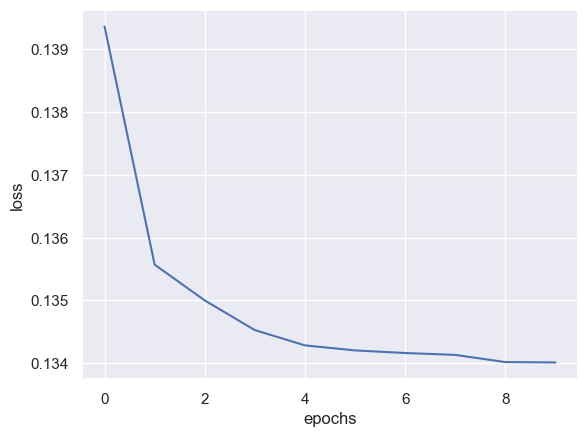

In [133]:
pd.DataFrame(history2.history)['loss'].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [148]:
print('Model_1 MSE: \t', mse1, '\nModel_2 MSE: \t', mse2)

Model_1 MSE: 	 0.036516930907964706 
Model_2 MSE: 	 0.036516930907964706


In [128]:
print('Percentage change in error from Model_1 to Model_2 is: \t', round((mse1-mse2)/mse1*100, 2), '%')

Percentage change in error from Model_1 to Model_2 is: 	 0.0 %


In [129]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 72)                1656      
                                                                 
 dense_2 (Dense)             (None, 64)                4672      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,393
Trainable params: 6,393
Non-trainable params: 0
_________________________________________________________________


Despite having a higher number of parameters, there is no significant improvement in the model performance. Howeever, taking a deeper look at the loss, this model seems to learn better as the loss converges slowly.

## Hyper-parameter tuning 

Model_3 is improvement version of model_2 with increased number of epochs and spliting the training set into training and validation set 

In [134]:
# Set random seed
tf.random.set_seed(419)

# Add an extra layer and increase number of units
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(72), # 48 units
  tf.keras.layers.Dense(64), # 64 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mse', 'msle'])

# Fit the model and save the history (we can plot this)
history3 = model_3.fit(X_train, y_train, epochs=20, validation_data = (X_val, y_val))


Epoch 1/20
1886/1886 [==============================] - 5s 2ms/step - loss: 0.1397 - mse: 0.0391 - msle: 0.0207 - val_loss: 0.1364 - val_mse: 0.0366 - val_msle: 0.0196
Epoch 2/20
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1360 - mse: 0.0379 - msle: 0.0200 - val_loss: 0.1354 - val_mse: 0.0370 - val_msle: 0.0198
Epoch 3/20
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1352 - mse: 0.0376 - msle: 0.0199 - val_loss: 0.1355 - val_mse: 0.0366 - val_msle: 0.0195
Epoch 4/20
1886/1886 [==============================] - 3s 2ms/step - loss: 0.1347 - mse: 0.0376 - msle: 0.0198 - val_loss: 0.1356 - val_mse: 0.0394 - val_msle: 0.0204
Epoch 5/20
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1346 - mse: 0.0376 - msle: 0.0198 - val_loss: 0.1349 - val_mse: 0.0385 - val_msle: 0.0201
Epoch 6/20
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1343 - mse: 0.0375 - msle: 0.0197 - val_loss: 0.1342 - val_mse: 0.0382 - val_msle:

In [135]:
loss3, mse3, msle3 = model_3.evaluate(X_test, y_test)
loss3, mse3, msle3

590/590 [==============================] - 1s 1ms/step - loss: 0.1348 - mse: 0.0380 - msle: 0.0199


(0.13480013608932495, 0.037984464317560196, 0.019863924011588097)

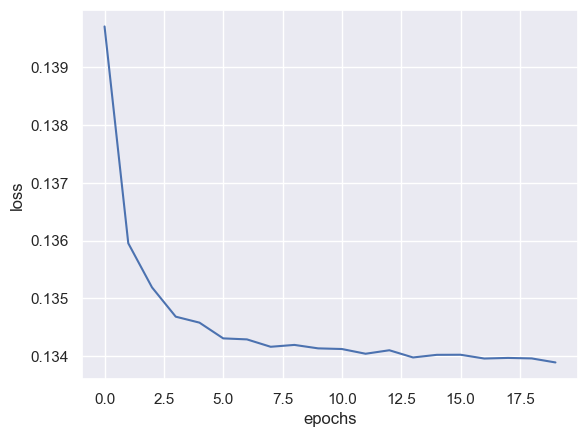

In [136]:
pd.DataFrame(history3.history)['loss'].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [137]:
print('Percentage change in error from Model_1 to Model_3 is: \t', round((mse1-mse3)/mse1*100, 2), '%')

Percentage change in error from Model_1 to Model_3 is: 	 -4.02 %


In [149]:
print('Model_1 MSE: \t', mse1, '\nModel_2 MSE: \t', mse2, '\nModel_3 MSE: \t', mse3)

Model_1 MSE: 	 0.036516930907964706 
Model_2 MSE: 	 0.036516930907964706 
Model_3 MSE: 	 0.037984464317560196


In [138]:
# Set random seed
tf.random.set_seed(419)

# Add an extra layer and increase number of units
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(72, activation = 'sigmoid'), # 72 units
  tf.keras.layers.Dense(64, activation = 'sigmoid'), # 64 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam works but SGD doesn't 
                          metrics=['mse', 'msle'])

# Fit the model and save the history (we can plot this)
history4 = model_4.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val))


Epoch 1/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1424 - mse: 0.0415 - msle: 0.0218 - val_loss: 0.1400 - val_mse: 0.0363 - val_msle: 0.0198
Epoch 2/50
1886/1886 [==============================] - 3s 2ms/step - loss: 0.1368 - mse: 0.0380 - msle: 0.0201 - val_loss: 0.1379 - val_mse: 0.0399 - val_msle: 0.0208
Epoch 3/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1358 - mse: 0.0376 - msle: 0.0199 - val_loss: 0.1406 - val_mse: 0.0410 - val_msle: 0.0214
Epoch 4/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1355 - mse: 0.0375 - msle: 0.0199 - val_loss: 0.1353 - val_mse: 0.0390 - val_msle: 0.0204
Epoch 5/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1335 - mse: 0.0367 - msle: 0.0195 - val_loss: 0.1347 - val_mse: 0.0382 - val_msle: 0.0201
Epoch 6/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1321 - mse: 0.0362 - msle: 0.0193 - val_loss: 0.1325 - val_mse: 0.0351 - val_msle:

1886/1886 [==============================] - 4s 2ms/step - loss: 0.1035 - mse: 0.0318 - msle: 0.0162 - val_loss: 0.1047 - val_mse: 0.0329 - val_msle: 0.0169
Epoch 50/50
1886/1886 [==============================] - 3s 2ms/step - loss: 0.1030 - mse: 0.0314 - msle: 0.0160 - val_loss: 0.1054 - val_mse: 0.0335 - val_msle: 0.0172


In [139]:
loss4, mse4, msle4 = model_4.evaluate(X_test, y_test)
loss4, mse4, msle4

590/590 [==============================] - 1s 1ms/step - loss: 0.1034 - mse: 0.0324 - msle: 0.0166


(0.10337284207344055, 0.03236020356416702, 0.0165670458227396)

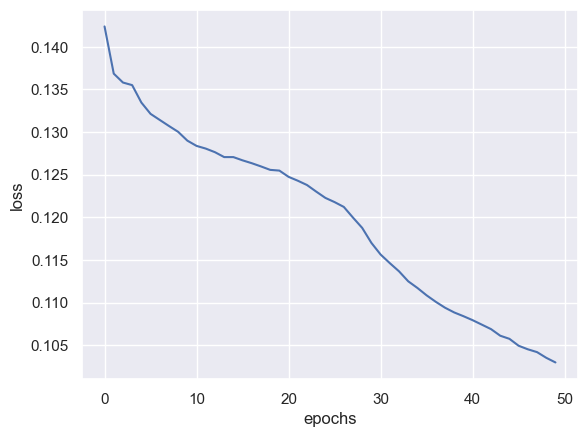

In [156]:
pd.DataFrame(history4.history)['loss'].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [141]:
print('Percentage change in error from Model_1 to Model_4 is: \t', round((mse1-mse4)/mse1*100, 2), '%')

Percentage change in error from Model_1 to Model_4 is: 	 11.38 %


In [150]:
print('Model_1 MSE: \t', mse1, '\nModel_2 MSE: \t', mse2, 
      '\nModel_3 MSE: \t', mse3, '\nModel_4 MSE: \t', mse4)

Model_1 MSE: 	 0.036516930907964706 
Model_2 MSE: 	 0.036516930907964706 
Model_3 MSE: 	 0.037984464317560196 
Model_4 MSE: 	 0.03236020356416702


In [142]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 72)                1656      
                                                                 
 dense_8 (Dense)             (None, 64)                4672      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,393
Trainable params: 6,393
Non-trainable params: 0
_________________________________________________________________


In [143]:
!pip install keras-tuner --upgrade
from tensorflow import keras
from tensorboard.plugins.hparams import api as hp
import keras_tuner as kt

In [144]:
def build_model(hp):
  inputs = keras.Input(shape=(22,))
  x = inputs
  # You can use hp.Int to sample an integer from a range
  x = keras.layers.Dense(hp.Int("units_1", 1, 64, step=8))(x)
  # You can use hp.Choice to sample from a list of values
  x = keras.layers.Activation(hp.Choice("activation_1", ["relu", "tanh", "sigmoid"]))(x)
  x = keras.layers.Dense(hp.Int("units_2", 1, 64, step=8))(x)
  x = keras.layers.Activation(hp.Choice("activation_2", ["relu", "tanh", "sigmoid"]))(x)
  outputs = keras.layers.Dense(1)(x) # Linear output for regression

  model = keras.Model(inputs=inputs, outputs=outputs)

  # You can use hp.Float to sample a float from a range
  optimizer = keras.optimizers.Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-1, sampling="log"))

  # You can also use hp.Fixed to use a fixed value
  loss = hp.Fixed("loss", "mean_squared_error")

  model.compile(optimizer=optimizer, loss=loss, metrics=["mean_absolute_error"])

  return model

In [146]:
tuner = kt.Hyperband(
build_model,
objective="val_mean_absolute_error",
max_epochs=50, seed=419,
directory="C:/Users/owner/Downloads/vehicle_data.csv",
project_name="Vehicle_price_nn"
)

# I will also use the same callbacks as before (EarlyStopping and TensorBoard):

callbacks = [
tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),
tf.keras.callbacks.TensorBoard(log_dir="C:/Users/owner/Downloads/vehicle_data.csv/Vehicle_price_nn")
]



In [147]:
tuner.search(
X_train,
y_train,
epochs=20,
validation_split=0.2,
callbacks=callbacks
)


Trial 90 Complete [00h 03m 15s]
val_mean_absolute_error: 0.07749006152153015

Best val_mean_absolute_error So Far: 0.07033427804708481
Total elapsed time: 00h 52m 14s
INFO:tensorflow:Oracle triggered exit


In [151]:
tuner.results_summary()

Results summary
Results in C:/Users/owner/Downloads/vehicle_data.csv\Vehicle_price_nn
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0088 summary
Hyperparameters:
units_1: 33
activation_1: relu
units_2: 9
activation_2: sigmoid
learning_rate: 0.004451613345557152
loss: mean_squared_error
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.07033427804708481

Trial 0073 summary
Hyperparameters:
units_1: 33
activation_1: relu
units_2: 41
activation_2: sigmoid
learning_rate: 0.0027888189146023316
loss: mean_squared_error
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0071
Score: 0.07104521244764328

Trial 0050 summary
Hyperparameters:
units_1: 33
activation_1: relu
units_2: 9
activation_2: sigmoid
learning_rate: 0.012261682173520349
loss: mean_squared_error
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0049
Score: 0.07396629452705383

Tr

In [152]:
# Set random seed
tf.random.set_seed(419)

# Add an extra layer and increase number of units
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(33, activation = 'relu'), # 48 units
  tf.keras.layers.Dense(41, activation = 'relu'), # 64 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0027888189146023316), # Adam works but SGD doesn't 
                          metrics=['mse', 'msle'])

# Fit the model and save the history (we can plot this)
history5 = model_5.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val))


Epoch 1/50
1886/1886 [==============================] - 5s 2ms/step - loss: 0.1142 - mse: 0.0312 - msle: 0.0160 - val_loss: 0.0867 - val_mse: 0.0198 - val_msle: 0.0092
Epoch 2/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.0826 - mse: 0.0175 - msle: 0.0083 - val_loss: 0.0823 - val_mse: 0.0185 - val_msle: 0.0087
Epoch 3/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.0793 - mse: 0.0161 - msle: 0.0077 - val_loss: 0.0783 - val_mse: 0.0161 - val_msle: 0.0077
Epoch 4/50
1886/1886 [==============================] - 5s 2ms/step - loss: 0.0774 - mse: 0.0156 - msle: 0.0075 - val_loss: 0.0775 - val_mse: 0.0152 - val_msle: 0.0073
Epoch 5/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.0765 - mse: 0.0153 - msle: 0.0073 - val_loss: 0.0742 - val_mse: 0.0151 - val_msle: 0.0073
Epoch 6/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.0758 - mse: 0.0152 - msle: 0.0073 - val_loss: 0.0768 - val_mse: 0.0152 - val_msle:

1886/1886 [==============================] - 3s 2ms/step - loss: 0.0660 - mse: 0.0124 - msle: 0.0059 - val_loss: 0.0663 - val_mse: 0.0126 - val_msle: 0.0060
Epoch 50/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.0658 - mse: 0.0123 - msle: 0.0059 - val_loss: 0.0669 - val_mse: 0.0125 - val_msle: 0.0059


In [153]:
loss5, mse5, msle5 = model_5.evaluate(X_test, y_test)
loss5, mse5, msle5

590/590 [==============================] - 1s 2ms/step - loss: 0.0674 - mse: 0.0123 - msle: 0.0059


(0.06744946539402008, 0.012299645692110062, 0.005914429668337107)

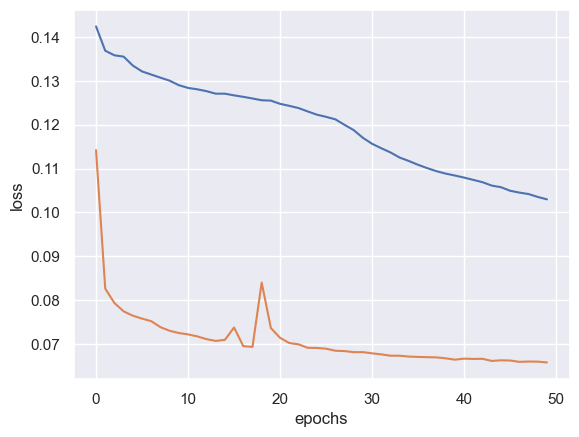

In [154]:
pd.DataFrame(history5.history)['loss'].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [155]:
print('Percentage change in error from Model_1 to Model_5 is: \t', round((mse1-mse5)/mse1*100, 2), '%')

Percentage change in error from Model_1 to Model_5 is: 	 66.32 %


In [157]:
print('Model_1 MSE: \t', mse1, '\nModel_2 MSE: \t', mse2, 
      '\nModel_3 MSE: \t', mse3, '\nModel_4 MSE: \t', mse4, 
     '\nModel_5 MSE: \t', mse5)


Model_1 MSE: 	 0.036516930907964706 
Model_2 MSE: 	 0.036516930907964706 
Model_3 MSE: 	 0.037984464317560196 
Model_4 MSE: 	 0.03236020356416702 
Model_5 MSE: 	 0.012299645692110062


It's important to note that the smaller the error, the better the model. Condidering the loss and metrics with the validation sets, it can be said that under-fitting/over-fitting is not well pronounced. However, as required the regularization function would be introduced 

## Address and fix issues such as Under-fitting/Over-fitting, overall runtime,

In [158]:
# Set random seed
tf.random.set_seed(419)

# Add an extra layer and increase number of units
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(33, activation = 'relu', activity_regularizer=tf.keras.regularizers.L1(0.02)), # 33 units
  tf.keras.layers.Dense(41, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L1(0.03)), # 41 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0027888189146023316), # Adam works but SGD doesn't 
                          metrics=['mse', 'msle'])

# Fit the model and save the history (we can plot this)
history6 = model_6.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val))


Epoch 1/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.2932 - mse: 0.0379 - msle: 0.0197 - val_loss: 0.1940 - val_mse: 0.0342 - val_msle: 0.0180
Epoch 2/50
1886/1886 [==============================] - 3s 2ms/step - loss: 0.1775 - mse: 0.0333 - msle: 0.0174 - val_loss: 0.1650 - val_mse: 0.0323 - val_msle: 0.0167
Epoch 3/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1561 - mse: 0.0316 - msle: 0.0163 - val_loss: 0.1499 - val_mse: 0.0310 - val_msle: 0.0159
Epoch 4/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.1392 - mse: 0.0298 - msle: 0.0149 - val_loss: 0.1230 - val_mse: 0.0245 - val_msle: 0.0116
Epoch 5/50
1886/1886 [==============================] - 3s 2ms/step - loss: 0.1152 - mse: 0.0201 - msle: 0.0095 - val_loss: 0.1159 - val_mse: 0.0196 - val_msle: 0.0089
Epoch 6/50
1886/1886 [==============================] - 3s 2ms/step - loss: 0.1070 - mse: 0.0180 - msle: 0.0085 - val_loss: 0.1073 - val_mse: 0.0189 - val_msle:

1886/1886 [==============================] - 4s 2ms/step - loss: 0.0878 - mse: 0.0166 - msle: 0.0079 - val_loss: 0.0888 - val_mse: 0.0171 - val_msle: 0.0080
Epoch 50/50
1886/1886 [==============================] - 3s 2ms/step - loss: 0.0879 - mse: 0.0166 - msle: 0.0079 - val_loss: 0.0955 - val_mse: 0.0204 - val_msle: 0.0096


In [159]:
loss6, mse6, msle6 = model_6.evaluate(X_test, y_test)
loss6, mse6, msle6

590/590 [==============================] - 1s 1ms/step - loss: 0.0919 - mse: 0.0190 - msle: 0.0089


(0.09185152500867844, 0.01897449791431427, 0.008877165615558624)

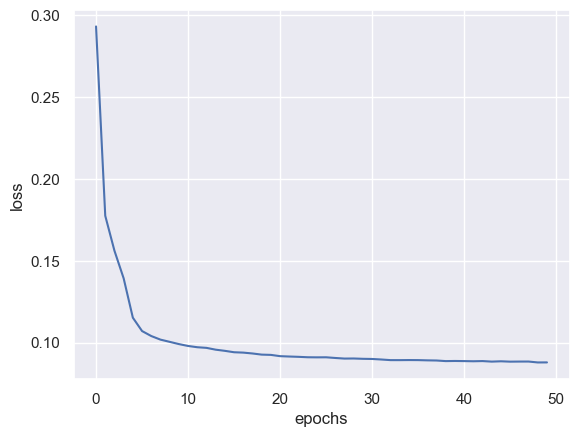

In [160]:
pd.DataFrame(history6.history)['loss'].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [161]:
print('Percentage change in error from Model_1 to Model_6 is: \t', round((mse1-mse6)/mse1*100, 2), '%')

Percentage change in error from Model_1 to Model_6 is: 	 48.04 %


In [162]:
print('Model_1 MSE: \t', mse1, '\nModel_2 MSE: \t', mse2, 
      '\nModel_3 MSE: \t', mse3, '\nModel_4 MSE: \t', mse4, 
     '\nModel_5 MSE: \t', mse5, '\nModel_6 MSE: \t', mse6)


Model_1 MSE: 	 0.036516930907964706 
Model_2 MSE: 	 0.036516930907964706 
Model_3 MSE: 	 0.037984464317560196 
Model_4 MSE: 	 0.03236020356416702 
Model_5 MSE: 	 0.012299645692110062 
Model_6 MSE: 	 0.01897449791431427


 ## Use Test data to show model prediction (10%) 

In [163]:
model_1_prdict = scaler.inverse_transform(model_1.predict(X_test))
model_1 = pd.DataFrame(model_1_prdict)
model_1

590/590 [==============================] - 1s 942us/step


,0
0,4990330.50
1,4924215.50
2,3260610.75
3,5421225.50
4,3045066.75
...,...
18855,4537654.00
18856,6507379.00
18857,4723270.50
18858,4710118.00


In [164]:
model_2_prdict = scaler.inverse_transform(model_2.predict(X_test))
model_2 = pd.DataFrame(model_2_prdict)
model_2

590/590 [==============================] - 1s 1ms/step


,0
0,4414047.50
1,4362866.50
2,3075796.50
3,4914218.50
4,2710303.75
...,...
18855,4033954.00
18856,5764949.50
18857,4177597.75
18858,4296250.00


In [166]:
model_3_prdict = scaler.inverse_transform(model_3.predict(X_test))
model_3 = pd.DataFrame(model_3_prdict, columns=['model_3'])
model_3

590/590 [==============================] - 1s 1ms/step


,model_3
0,4386942.50
1,4329363.00
2,3113675.50
3,4919190.50
4,2888984.25
...,...
18855,3982613.00
18856,5994812.00
18857,4145482.50
18858,4157039.00


In [167]:
model_4_prdict = scaler.inverse_transform(model_4.predict(X_test))
model_4_prdict

590/590 [==============================] - 1s 1ms/step


array([[ 411017.8 ],
       [ 393712.38],
       [1247535.5 ],
       ...,
       [1059386.6 ],
       [2666567.2 ],
       [3377938.  ]], dtype=float32)

In [168]:
model_5_prdict = scaler.inverse_transform(model_5.predict(X_test))
model_5_prdict

590/590 [==============================] - 1s 1ms/step


array([[  717346.7 ],
       [  671480.75],
       [ 1407736.9 ],
       ...,
       [12522790.  ],
       [ 3234591.5 ],
       [ 6597069.  ]], dtype=float32)

In [169]:
model_6_prdict = scaler.inverse_transform(model_6.predict(X_test))
model_6_prdict

590/590 [==============================] - 1s 1ms/step


array([[ 297557.78],
       [ 263106.25],
       [1412861.5 ],
       ...,
       [8712761.  ],
       [2749224.8 ],
       [5368303.  ]], dtype=float32)

In [170]:
y_actual = scaler.inverse_transform(y_test)
y_actual

array([[  134236.63614307],
       [  579906.49865644],
       [  750162.40118964],
       ...,
       [15522365.70921708],
       [ 3754678.32824607],
       [ 4455732.04455923]])

In [188]:
pd.options.display.float_format = '{:,.2f}'.format

In [191]:
predictions = pd.DataFrame({'model1':model_1_prdict.reshape(-1,1)[:,0], 'model2':model_2_prdict.reshape(-1,1)[:,0], 
             'model3':model_3_prdict.reshape(-1,1)[:,0], 'model4':model_4_prdict.reshape(-1,1)[:,0], 
             'model5':model_5_prdict.reshape(-1,1)[:,0], 'model6':model_6_prdict.reshape(-1,1)[:,0], 
             'actual':y_actual.reshape(-1,1)[:,0]})

In [201]:
# Comapre predictions of the initial model and best model with the Actual price
compare_pred = predictions[['model1', 'model5', 'actual']].rename(columns={'model5':'Best Model', 'model1':'Initial Model', 
                                                              'actual':'Actual Price'})


In [202]:
compare_pred.sample(15)

,Initial Model,Best Model,Actual Price
2697,"4,988,395.00","716,112.62","725,124.77"
4462,"3,388,314.50","1,764,005.38","3,404,151.47"
2765,"4,127,503.50","453,092.38","79,153.84"
6374,"2,127,223.50","4,355,504.00","5,206,861.03"
722,"1,306,538.75","1,300,902.88","980,508.62"
10964,"3,330,152.50","2,708,900.75","11,516,344.47"
11806,"10,585,637.00","13,166,796.00","14,821,311.99"
16176,"4,257,928.00","2,774,931.00","2,292,480.58"
10376,"6,801,049.00","11,120,491.00","7,199,856.59"
12657,"10,339,423.00","4,502,595.50","4,480,769.68"


## Summary

In [176]:
model_evaluations = {'LOSS':[loss1, loss2, loss3, loss4, loss5, loss6], 
                    'MSE':[mse1, mse2, mse3, mse4, mse5, mse6], 
                    'MSLE':[msle1, msle2, msle3, msle4, msle5, msle6]}

In [177]:
pd.DataFrame(model_evaluations, index=['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6'])

,LOSS,MSE,MSLE
model_1,0.135352,0.036517,0.019515
model_2,0.135352,0.036517,0.019515
model_3,0.134800,0.037984,0.019864
model_4,0.103373,0.032360,0.016567
model_5,0.067449,0.012300,0.005914
model_6,0.091852,0.018974,0.008877


- A deep learning model was developed for the prediction of the price of vehicle in India Rupees, from data scraped from Sri Lanka's most famous online vehicle buying selling platform. 
- The dataset is made up of 123,971 samples accross 19 features, which was reduced to about 100,000 samples across 10 features after cleaning.
- A simple neural network was developed and the model performance measured by the MSE was found to be 0.0365. 
- The architecture of the deep learning model was designed to have two (2) hidden layers which have 72 and 64 neurons respectively, and a linear output layer
- The model was improved by tuning the hyperparameters using the keras_tuner library. 
- The best parameters for the model architecture was obtained and developed as model_5.
- The best performing model is model_5 with a loss of 0.067, MSE of 0.012 and MSLE of 0.0059. Best performing model is the model with the lowest error. 
- This is evident as the MSE was reduced by about 70% (from 0.036 to 0.012) in comparison with the initial model (model_1)
- The effect of regularization (model_6) on my best performing model (model_5) wasn't felt as the model performance dropped; loss dropped from 0.067 to 0.092 
- This is evident as the MSE was increased by about 50% (from 0.012 to 0.019)

To improve the performance of the model
- The model architecture used may not be suitable for this problem as it may be too simple/too complex for this problem. Hence, we may experiment with different model architectures and layers, such as adding more neurons, more layers, dropout layers, batch normalization layers, etc. 
- During the data cleaning process, the vehicle edition was dropped (because it contains over 50% missing entries) which is also a good feature for price determination. Consequently, the data should be explored thoroughly and some feature engineering/selection be performed to create more meaningful or relevant features for the problem. 

In [206]:
(msle5-msle6)/msle5*100

-50.09334988092802